In [ ]:
import tensorflow as tf
import pickle as pkl
import os
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import transform
from __future__ import print_function
%matplotlib inline

## load data from image files
no need to run this if you have the pickle file

In [ ]:
label = pd.read_csv('train/label_train.csv')

In [ ]:
y_train = np.array(label.iloc[:,2].tolist())

In [ ]:
X_train = []
for i,r in label.iterrows():
    #print (r.iloc[1])
    img = cv2.imread('train/images/'+r.iloc[1][-4:]+'.jpg')
    img = transform.resize(img,[128,128]).astype(np.float32)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X_train.append(img)
    

In [ ]:
X_train = np.array(X_train,dtype=np.float32)

In [ ]:
X_train = 255 * X_train
X_train = X_train.astype(np.uint8)

In [ ]:
X_train.shape,y_train.shape

In [ ]:
with open("data/X_train128.pkl", "wb") as output_file:
     pkl.dump((X_train, y_train), output_file)

## Load data from pickle file

In [24]:
with open("data/X_train256.pkl", "rb") as input_file:
     X_train,y_train = pkl.load(input_file)

In [25]:
X_train.shape, y_train.shape

((3000, 256, 256, 3), (3000,))

## Show image with labels

[3 3 3 2 1 2 3 1 3 2 1 1 2 1 3 3]


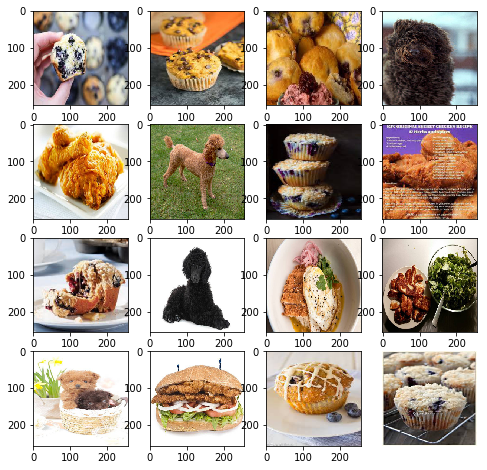

In [26]:
num_show = 16
mask = np.random.choice(X_train.shape[0], num_show, replace=False)
X_show = X_train[mask,:,:,:]
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))
plt.axis("off")
for i in range(r):
    for j in range(r):
        #print(image.shape)
        image = X_show[r*i+j]
        axarr[i][j].imshow(image)
print(y_train[mask])

## Seperate Training set and Test set

In [5]:
num_train,height,weight,channels = X_train.shape
index = np.random.choice(num_train,num_train,replace=False)
X_train = X_train[index]
y_train = y_train[index]

num_val = int(num_train*0.1)
X_val = X_train[:num_val]
y_val = y_train[:num_val]

X_train = X_train[num_val:]
y_train = y_train[num_val:]

# X_train = X_train.reshape([X_train.shape[0],-1])
# X_val = X_val.reshape([X_val.shape[0],-1])
# mean_image = np.mean(X_train, axis=0)
# X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
# X_val = X_val.astype(np.float32) - mean_image
# X_train = X_train.reshape([num_train-num_val,height,weight,channels])
# X_val = X_val.reshape([num_val,height,weight,channels])

print(X_train.shape,X_val.shape)

(2700, 256, 256, 3) (300, 256, 256, 3)


In [6]:
from modules.neuralnets.kaggle import my_training,my_training_task4,prediction_on_test
import tensorflow as tf
%matplotlib inline
%load_ext autoreload
%autoreload 2

## confirm the labels again

[2 2 1 3 3 2 3 2 3 1 3 2 1 3 2 1]


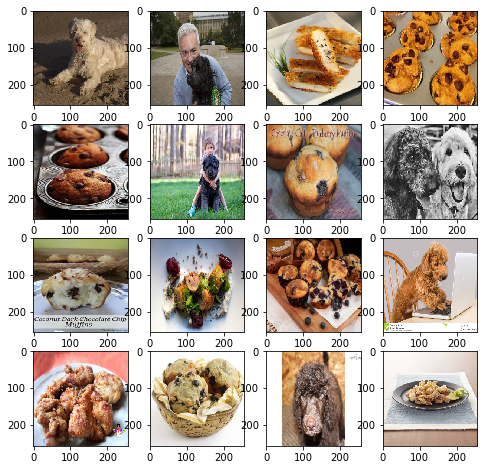

In [7]:
num_show = 16
mask = np.random.choice(X_train.shape[0], num_show, replace=False)
X_show = X_train[mask,:,:,:]
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        image = X_show[r*i+j]
        axarr[i][j].imshow(image,cmap="gray")
print(y_train[mask])

## Traninig
We change the labels from (1,2,3) to (0,1,2)

In [8]:
tf.reset_default_graph()
y_train = y_train-1
y_val = y_val-1
my_training(X_train, y_train, X_val, y_val,
            conv_featmap=[32,32,16,16],
            fc_units=[200,100],
            conv_kernel_size=[4,4,4,4],
            pooling_size=[3,3,3,3],
            l2_norm=0,
            seed=235,
            learning_rate=2e-5,
            epoch=50,
            batch_size=128,
            verbose=True,
            pre_trained_model=None)

Building my LeNet. Parameters: 
conv_featmap=[32, 32, 16, 16]
fc_units=[200, 100]
conv_kernel_size=[4, 4, 4, 4]
pooling_size=[3, 3, 3, 3]
l2_norm=0
seed=235
learning_rate=2e-05
number of batches for training: 21
epoch 1 
loss: 1.1744974851608276
loss: 1.203121542930603
epoch 2 
loss: 1.1075208187103271
loss: 1.117583990097046
epoch 3 
loss: 1.0871886014938354
loss: 1.1042741537094116
epoch 4 
loss: 1.0880166292190552
loss: 1.0902941226959229
epoch 5 
loss: 1.0924264192581177
loss: 1.0891804695129395
2048/2700 loss: 1.0891804695129395 validation accuracy : 48.0% training accuracy: 40.625%
Best validation accuracy! iteration:100 accuracy: 48.0%
epoch 6 
loss: 1.089012861251831
loss: 1.0831246376037598
epoch 7 
loss: 1.0810575485229492
loss: 1.0677225589752197
epoch 8 
loss: 1.0697147846221924
loss: 1.0753133296966553
epoch 9 
loss: 1.0825660228729248
loss: 1.0710558891296387
epoch 10 
loss: 1.0724689960479736
loss: 1.0548080205917358
1408/2700 loss: 1.0548080205917358 validation accuracy

## precdict

In [10]:
prediction_on_test(X_val,'lenet_1519920988',batch_size=100,mode='new')

INFO:tensorflow:Restoring parameters from model/lenet_1519920988


[2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,


In [12]:
prediction_on_test(X_train,'lenet_1519920988',batch_size=100,mode='new')

INFO:tensorflow:Restoring parameters from model/lenet_1519920988


[1,
 0,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
